# Demonstration File

In [27]:
#Import necessary libraries

import sys
import os

# Make it so you can get modules from the parent directory
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

import test_manifold_algorithms as tma
from MASH import MASH
from SPUD import SPUD
from temporal_progression_comparisons import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Testing with Profile Variables

In [28]:
LABEL_VARIABLE = "DX_bl"
SAMPLE_SIZE = 200
profile_raw = pd.read_excel(r"..\..\CSV Files\Profile Variables 2024-07-31.xlsx", index_col="RID")

#remap a few variables, might make part of the merge later
profile_raw['DX_bl'] = profile_raw['DX_bl'].map({'CN': 0, 'SMC': 1, 'EMCI': 2, 'LMCI': 3, 'AD': 4, 'NaN': -4})
profile_raw['PTMARRY'] = profile_raw['PTMARRY'].map({'Married': 1, 'Widowed': 2, 'Divorced': 3, 'Never married': 4, 'Unknown': -4, 'NaN': -4})
profile_raw.fillna(-4, inplace=True)

#get rid of label variable, problematic columns, and patients with no data for the datase to run
profile = profile_raw.drop(columns = ["PTRACCAT"]).dropna(how="all")
label_column = profile_raw[LABEL_VARIABLE]

anchors = [[x,x] for x in range(SAMPLE_SIZE)]
labels = pd.concat([label_column[:SAMPLE_SIZE], label_column[:SAMPLE_SIZE]])

domain_a = np.array(profile)[:SAMPLE_SIZE, :21].astype(float)
domain_b = np.array(profile)[:SAMPLE_SIZE, 21:].astype(float)

<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


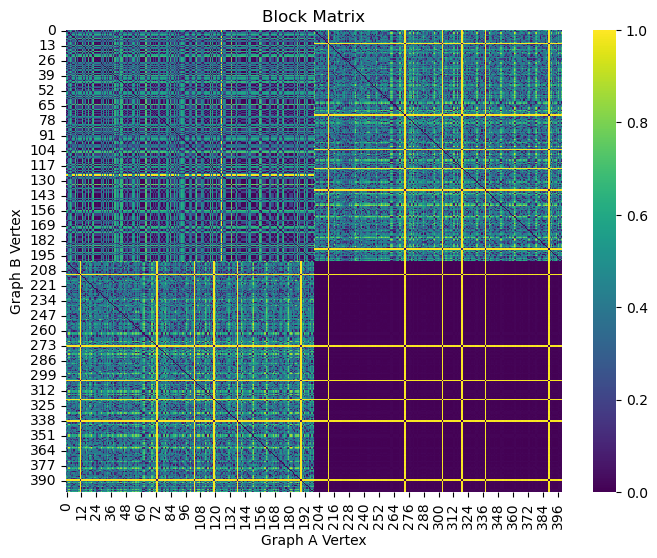

c:\Users\jcory\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Cross Embedding: 0.42500000000000004
FOSCTTM: 0.0


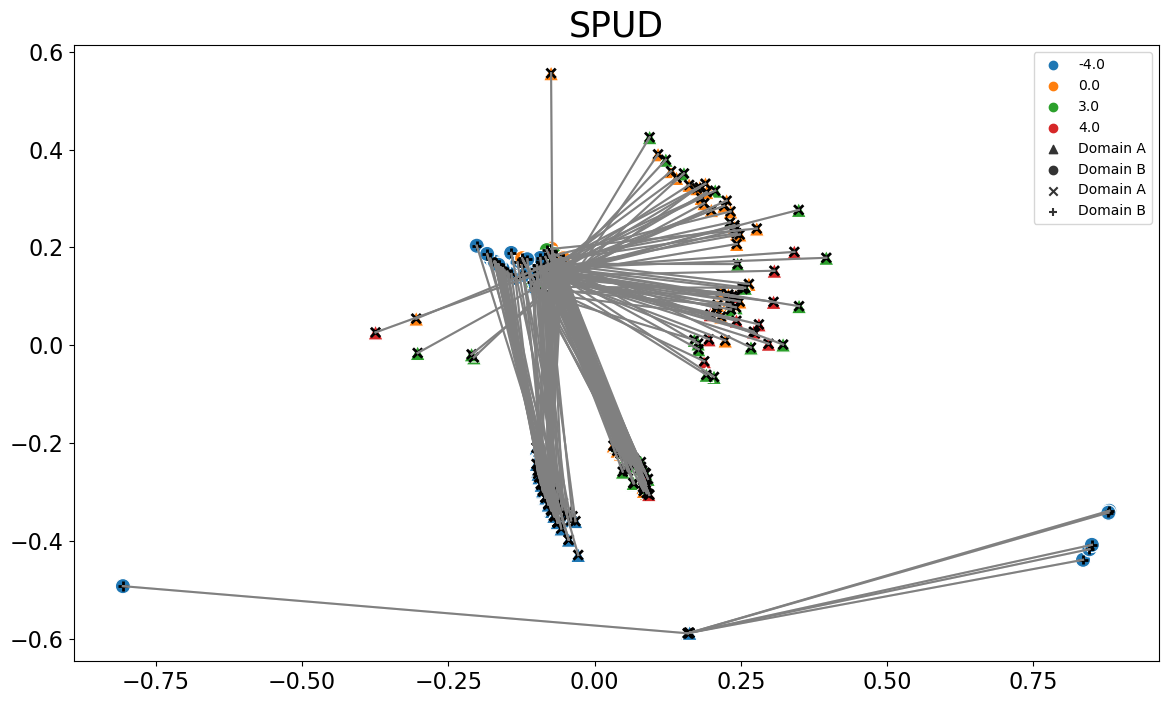

In [29]:
#define and fit the model
spud_time = SPUD(knn = 2, verbose = 2)
spud_time.fit(dataA = domain_a, dataB = domain_b, known_anchors=anchors)

# plot the graphs
spud_time.plot_heat_map()
spud_time.plot_emb(labels = labels)